# Python Foundations - Hands On Quiz

Attribute Information:

* age: Age of the person in years
* workclass: Employment type of the person
* fnlwgt: final weight
* education: Educational qualification of the person
* education-num: Number of years of education
* marital-status: Marital status of the person
* occupation: Occupation of the person
* relationship: Relationship status of the person/Role of the person in the family
* race: Human categorization of the person
* sex: Gender of the person
* capital-gain: capital gained
* capital-loss: capital loss
* hours-per-week: work hours per week
* native-country: Native country of the person
* salary: Salary of the person

The data has a salary column along with the other categories to predict the income of the people based on a demographic.

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data1 = pd.read_csv('adult_test.csv')
data2 = pd.read_csv('adult_data.csv')

In [4]:
df1 = data1.copy()
df2 = data2.copy()

In [5]:
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
print(df1.shape)
print(df2.shape)

(16281, 15)
(32561, 15)


In [19]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [20]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,16281.0,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
fnlwgt,16281.0,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
education-num,16281.0,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
capital-gain,16281.0,1081.905104,7583.935968,0.0,0.0,0.0,0.0,99999.0
capital-loss,16281.0,87.899269,403.105286,0.0,0.0,0.0,0.0,3770.0
hours-per-week,16281.0,40.392236,12.479332,1.0,40.0,40.0,45.0,99.0


In [15]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [16]:
df1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [18]:
df2.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### Which type of education is the most frequent for the dataset "adult_data.csv"?

In [110]:
# including .count() provides just the count of different education values, such as HS-grad.
df2['education'].value_counts().count()

16

In [112]:
# .unique() provides the number of unique values for a particular column/category
df2['education'].nunique()

16

In [108]:
# value_counts() automatically sorts in descending order
df2['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

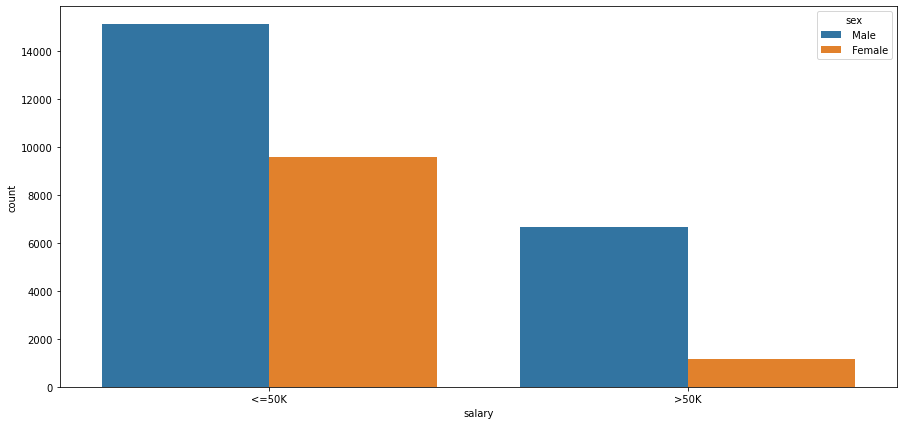

In [34]:
plt.figure(figsize=(15, 7)) # To resize the plot
sns.countplot(x='salary', data=df2, hue='sex')
plt.show()

In [35]:
# combine dataframes
frames = [df1, df2]

In [38]:
df3 = pd.concat(frames)

# or, isntaed of the above two lines, another way to combine data frames (uncomment the below code)
# d3 = pd.concat([d1, d2], axis=0, ignore_index=True)

In [39]:
print(df3.shape)

(48842, 15)


In [40]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [105]:
# Now, what is the value of average "hours-per-week" in the new d3 data set?

country_mean=df3['hours-per-week'].mean()
country_mean

40.422382375824085

### Which country ("native-country") has the highest mean value of "hours-per-week" for the dataset "adult_data.csv"?

In [118]:
# the following formula provides raw data/information with Thailand an apparent "winner". 
df2.groupby(['native-country'])['hours-per-week'].mean().sort_values(ascending=False)

native-country
 Thailand                      45.444444
 France                        45.068966
 Yugoslavia                    44.562500
 Greece                        44.241379
 Iran                          43.976744
 Japan                         43.693548
 Dominican-Republic            42.471429
 Ireland                       42.416667
 South                         42.412500
 Portugal                      41.891892
 Outlying-US(Guam-USVI-etc)    41.857143
 England                       41.833333
 Italy                         41.602740
 India                         41.530000
 ?                             41.512864
 Scotland                      41.250000
 Germany                       41.014599
 Hong                          40.900000
 Cambodia                      40.894737
 United-States                 40.447755
 Canada                        40.404959
 Mexico                        40.340591
 Laos                          40.333333
 Holand-Netherlands            40.000000
 

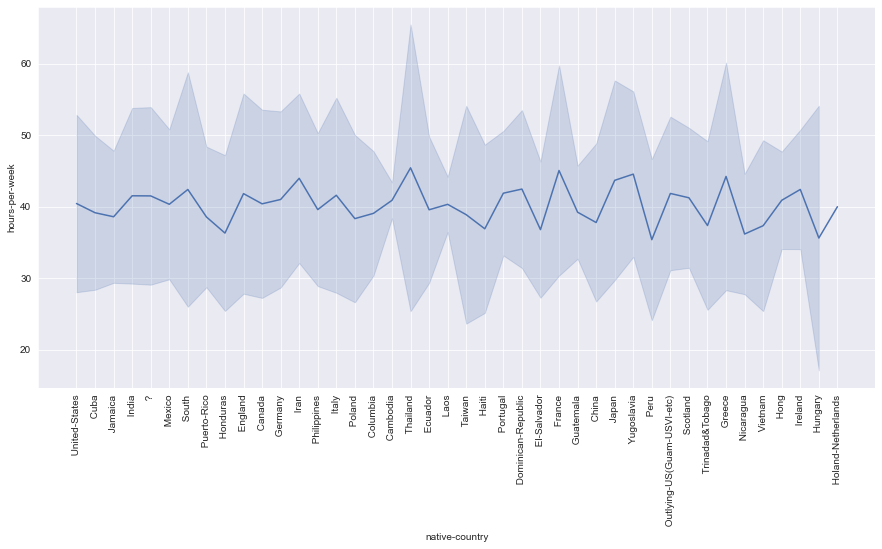

In [115]:
# by looking at lineplot, you see something similar, though harder to distinguish between Thailand and France
plt.figure(figsize=(15, 7))
bars = sns.lineplot(y='hours-per-week', x='native-country', ci="sd", data=df2)
plt.setp(bars.get_xticklabels(), rotation=90);

In [74]:
print('native-country', round(df2['hours-per-week'].mean()))

native-country 40


### What is the correct >distribution< of age for dataset "adult_data.csv"?

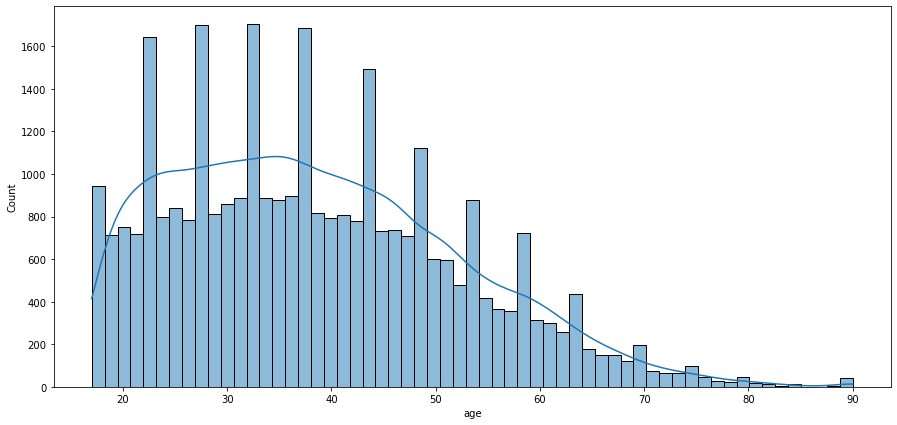

In [103]:
######
# this is the correct answer when looking for distribution (use histplot)
######

plt.figure(figsize=(15, 7))
sns.histplot(df2['age'], kde=True) # KDE draws the line over the histogram
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

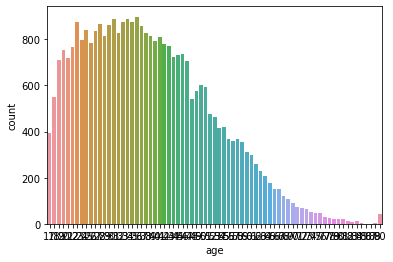

In [101]:
# incorrect
sns.countplot(df2.age)

<AxesSubplot:xlabel='age', ylabel='Density'>

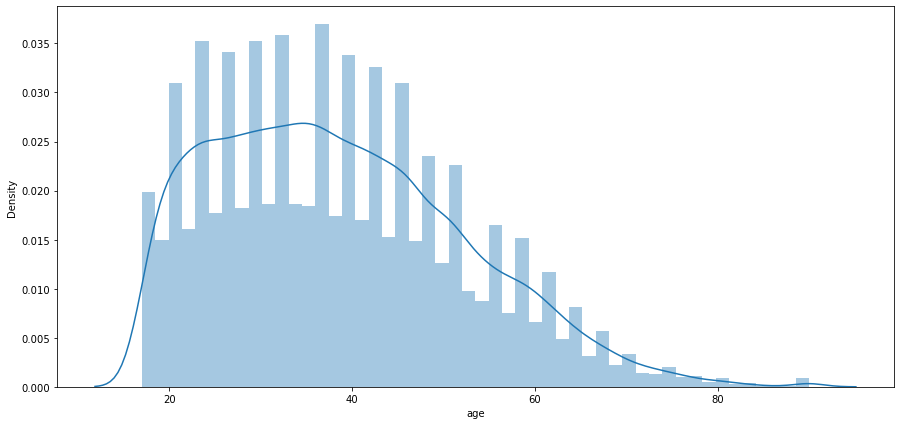

In [102]:
# also incorrect
plt.figure(figsize=(15, 7))
sns.distplot(df2["age"])

### How many people have capital loss greater than zero (0) in the dataset "adult_data.csv"?

In [124]:
# this is the correct way
# len(df2[df2['capital-loss'] > 0]) # will also work
len(df2[(df2['capital-loss'] > 0)])

1519

In [125]:
# this way is not entirely correct, because it counts the number of times a capital loss greater than 0 shows...
# ... under each category of data, so each category shows 1519
df2[df2['capital-loss'] > 0].count()

age               1519
workclass         1519
fnlwgt            1519
education         1519
education-num     1519
marital-status    1519
occupation        1519
relationship      1519
race              1519
sex               1519
capital-gain      1519
capital-loss      1519
hours-per-week    1519
native-country    1519
salary            1519
dtype: int64

### Which Occupation has the 2nd highest average working hours for dataset "adult_data.csv"?

In [129]:
# The 2nd highest is Exec-managerial. I picked Farming-fishing incorrectly interpreting the 1st instead of the 2nd

df2.groupby(['occupation'])['hours-per-week'].mean().sort_values(ascending=False)

occupation
 Farming-fishing      46.989940
 Exec-managerial      44.987703
 Transport-moving     44.656230
 Protective-serv      42.870570
 Prof-specialty       42.386715
 Craft-repair         42.304221
 Sales                40.781096
 Machine-op-inspct    40.755744
 Armed-Forces         40.666667
 Tech-support         39.432112
 Handlers-cleaners    37.947445
 Adm-clerical         37.558355
 Other-service        34.701669
 Priv-house-serv      32.885906
 ?                    31.906131
Name: hours-per-week, dtype: float64

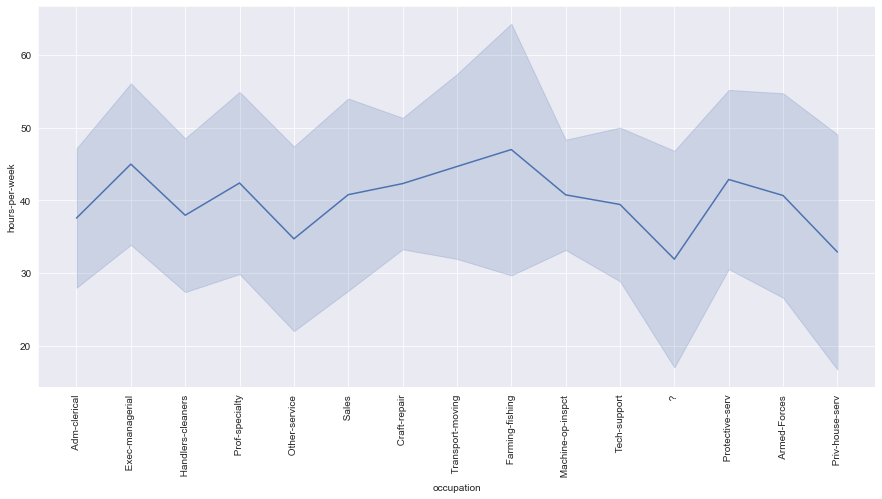

In [127]:
# The lineplot bar below also shows the Exec-managerial occupation as the 2nd highest. 

plt.figure(figsize=(15, 7))
bars = sns.lineplot(y='hours-per-week', x='occupation', ci="sd", data=df2)
plt.setp(bars.get_xticklabels(), rotation=90);